___
# Atividade: Modelos probabilísticos discretos e Dados
___

## Aula 10

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): Seções 3.2 e 3.3

**Hoje:**
1.	Descrever modelos discretos quanto aos resultados teóricos.
2.	Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3.	Contrastar resultados teóricos e empíricos.
4.	Fechamento do conteúdo.

**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
import itertools #importante para gerar todos os resultados possíveis!!


___
## <font color='blue'>Exercício 1</font>

Um resistor de 100K Ohms comprado na Santa Efigênia tem probabilidade de falha de 5%, segundo um fabricante ruim.

Ainda, assuma os resistores falham de forma independente entre si.

Um aluno de engenharia compra um pacote contendo $n$ resistores.

1. Assuma $n=3$ e faça os itens a seguir.
  1. Monte o espaço amostral que combine todos os resultados possíveis de Falha e não Falha desses $n$ resistores. Ainda, calcule a probabilidade de cada resultado do espaço amostral acontecer.
  2. Se $Y$ representa o número de resistores que falham em um pacotinho com $n$ resistores, então construa a distribuição de probabilidades de $Y$.
  3. Calcule a média e o desvio padrão de $Y$. Interprete os resultados.
    
2. Assuma $n=7$ e repita os itens A) a C) anteriores. No caso de $n=7$ ou maiores quantidades de resistores em um pacotinho, qual a viabilidade de construir a distribuição de probabilidades do número de resistores com defeitos quando $n$ não é pequeno?
    
3. Encontre a distribuição de probabilidades de cada possível valor de $Y$ utilizando a distribuição Binomial para $n=3$ e $n=7$. Calcule também $E(X)$ e $Var(X)$. Compare com as distribuições de probabilidades obtidas nos itens anteriores e discuta porque esses valores são iguais ou diferentes!
    
> **DISTRIBUIÇÃO BINOMIAL - TEORIA:**

> É responsável por modelar uma variável $Y$ definida pelo Número de sucessos em $n$ tentativas, cuja probabilidade de sucesso é dada por $p$. Assim, dizemos que $Y$~$Bin(n,p)$ e lê-se: $Y$ segue uma distribuição binomial com $n$ tentativas e $p$ como probabilidade de sucesso. 

> A função de probabilidade nesse caso é dada por:
$P(Y=y)=\left(
\begin{array}{c}
    n \\
    y
\end{array}\right) p^y (1-p)^{(n-y)}$

> Para um experimento ter as probabilidade dos números de sucessos modeladas por uma distribuição Binomial, o mesmo precisa ter as seguintes propriedades:
* é uma contagem de $n$ repetições (ou tentativas ou ensaios) idênticas;
* cada repetição tem apenas 2 resultados possíveis: um é denominado sucesso e o outro, fracasso;
* a probabilidade de sucesso para cada ensaio é denominada $p$ e será constante em cada repetição. Então, a probabilidade de fracasso $(1-p)$ também não varia de tentativa para tentativa;
* As tentativas são independentes.


> **DISTRIBUIÇÃO BINOMIAL - PYTHON:** <sup> [https://en.wikipedia.org/wiki/SciPy]

> Algumas funções úteis para desenvolver seu código: <sup> [http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.binom.html]
* $P(Y=y)$: `stats.binom.pmf(y, n, p)`
* $P(Y\leq y)$: `stats.binom.cdf(y, n, p)`
* $E(X)$ e $Var(X)$: `stats.binom.stats(n, p, moments='mv')`


In [4]:
#item 1
n=3
possibilidades = ["nF", "F"]
prob = {"nF": 0.95, "F":0.05}
arranjos = itertools.product(possibilidades, repeat=n)
espaco_amostral = list(arranjos)

In [5]:
espaco_amostral

[('nF', 'nF', 'nF'),
 ('nF', 'nF', 'F'),
 ('nF', 'F', 'nF'),
 ('nF', 'F', 'F'),
 ('F', 'nF', 'nF'),
 ('F', 'nF', 'F'),
 ('F', 'F', 'nF'),
 ('F', 'F', 'F')]

In [6]:
prob_linhas = []

for res in espaco_amostral:
    p = 1.0
    for e in res:
        p*=prob[e]
    prob_linhas.append(p)

prob_linhas

[0.8573749999999999,
 0.045125,
 0.045125,
 0.0023750000000000004,
 0.045125,
 0.0023750000000000004,
 0.0023750000000000004,
 0.00012500000000000003]

In [7]:
prob1 = prob_linhas[0]
prob2 = prob_linhas[1] + prob_linhas[2] + prob_linhas[4]
prob3 = prob_linhas[3] + prob_linhas[5] + prob_linhas[6]
prob4 = prob_linhas[7]

___
## <font color='blue'>Exercício 2</font>

Uma fábrica produz determinado veículo. O gerente de vendas fechou um negócio que implica na produção de pelo menos 110 unidades nos próximos dois meses. Para isso, será construída uma nova linha de montagem com capacidade para produzir em média 50 veículos por mês (considere meses de 30 dias). A linha funcionará ininterruptamente. Além disso, apenas um veículo é produzido por vez. Considere que um modelo Poisson seja adequado para a quantidade de veículos produzidos.
   1. Qual a probabilidade  da produção ser igual a 100 veículos nos próximos dois meses?
   2. Qual a probabilidade  da produção ser de pelo menos 100 veículos nos próximos dois meses?
   3. Qual a probabilidade da produção ser entre 100 e 110 veículos nos próximos dois meses?
   4. Se forem produzidos de pelo menos 100 veículos no próximo mês, qual a probabilidade do gerente cumprir a meta negociada?
   5. Caso o prazo seja cumprido, o lucro será da ordem de $250$ mil, caso não seja, o lucro cai para $200$ mil. Qual é o lucro esperado e seu desvio-padrão?

**Observação:** Explore os comandos de `stats.poisson`. <sup>[http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html]


respostas
1. 0,03986 P(X=100)
2. 0,51330 P(X>=100)
3. 0,36616 P(100<=X<=100)
4. 0,33228 P

___
## <font color='blue'>Exercício 3</font> 
### <font color='red'>**Check para dia 13/09 em DUPLA **</font>

Esse exercício irá explorar uma modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**

> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*

> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. Se, no final das contas, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado de que seu carro está sem problemas com a vistoria.

1. A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações: tipo de carro (1: Popular e 2: Não Popular) e quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14). 
    1. Considerando todos os carros, analise a quantidade de itens vistoriados em não conformidade. Pela tabela de frequências relativas, calcule a média e variância dessa quantidade. Interprete-os.
    2. Assuma que a variável *Quantidade de itens em não conformidade* possa ser ajustada pelo modelo Binomial com parâmetros $n=14$ e $p=0,10$. Interprete esses parâmetros para o problema em questão e, ainda, discuta se as propriedades da distribuição Binomial estão satisfeitas para o problema aqui me questão.
    
    **Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos itens!**
    3. Utilizando o método `stats.binom.pmf`, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade quando $n=14$ e $p=0,10$. Calcule o valor esperado e a variância da quantidade de itens em não conformidade utilizando o método `stats.binom.stats` e via resultado da Tabela 4.4 do Magalhães e Lima (pág. 125).
    4. Compare as probabilidades teóricas com as frequências relativas observadas nos dados. Para isso, tem-se, por exemplo, as duas opções abaixo para comparar se os resultados empíricos se encaixam com o modelo teórico proposto. 
        - A primeira opção gráfica contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade! Vide Figura 3.4 do livro Magalhães e Lima (pág. 87). Ou seja, essa opção contrasta a frequência relativa em um valor de $y$ e a probabilidade pontual $P(Y=y)$.
        - A segunda contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Ou seja, compara a frequência relativa acumulada até $y$ com a probabilidade acumulada $P(Y\leq y)$.
    Construa os gráficos de acordo com as duas opções e refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão!
    5. Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?
    6. Considerando apenas os carros populares, o modelo Binomial com parâmetros $n=14$ e $p=0,10$ é adequado para ajustar a variável Quantidade de itens em não conformidade? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição ajuste aos dados.

In [8]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())
carros = pd.read_table('Carros.txt', sep=' ')

Esperamos trabalhar no diretório
C:\Users\Henrique\Documents\semestre2-insper\CIENCIA DOS DADOS


## A

In [9]:
freq_r = carros.Quantidade.value_counts(True)
print(freq_r)
print('')
print('A média de itens vistoriados em não conformidade por carro é igual a ', carros.Quantidade.mean())
print('')
print('Variância = ', carros.Quantidade.var())

1    0.316667
0    0.288000
2    0.221333
3    0.108333
4    0.046333
5    0.015667
6    0.002667
7    0.000667
8    0.000333
Name: Quantidade, dtype: float64

A média de itens vistoriados em não conformidade por carro é igual a  1.3713333333333333

Variância =  1.5799715460709343


In [10]:
print('Variância = ', carros.Quantidade.var())

Variância =  1.5799715460709343


## B
Não, pois há 14 itens que podem estar em não conformidade em um carro e as probabilidades de não conformidade de cada um são diferentes e não todas igual a 0,1.

## C

In [11]:
n = 14
p = 0.1
pr = []
for y in range(15):
    pr.append(stats.binom.pmf(y,n,p))

print('A probabilidade de haver 1 item em não conformidade é:', pr[1])
print('A probabilidade de haver 2 item em não conformidade é:', pr[2])
print('A probabilidade de haver 3 item em não conformidade é:', pr[3])
print('A probabilidade de haver 4 item em não conformidade é:', pr[4])
print('A probabilidade de haver 5 item em não conformidade é:', pr[5])
print('A probabilidade de haver 6 item em não conformidade é:', pr[6])
print('A probabilidade de haver 7 item em não conformidade é:', pr[7])
print('A probabilidade de haver 8 item em não conformidade é:', pr[8])
print('A probabilidade de haver 9 item em não conformidade é:', pr[9])
print('A probabilidade de haver 10 item em não conformidade é:', pr[10])
print('A probabilidade de haver 11 item em não conformidade é:', pr[11])
print('A probabilidade de haver 12 item em não conformidade é:', pr[12])
print('A probabilidade de haver 13 item em não conformidade é:', pr[13])
print('A probabilidade de haver 14 item em não conformidade é:', pr[14])
print('')

print('Valor esperado:', n*p)
print('')
print('Variância:', n*p*(1-p))

A probabilidade de haver 1 item em não conformidade é: 0.355861215966
A probabilidade de haver 2 item em não conformidade é: 0.257010878198
A probabilidade de haver 3 item em não conformidade é: 0.114227056977
A probabilidade de haver 4 item em não conformidade é: 0.034902711854
A probabilidade de haver 5 item em não conformidade é: 0.00775615818978
A probabilidade de haver 6 item em não conformidade é: 0.00129269303163
A probabilidade de haver 7 item em não conformidade é: 0.00016415149608
A probabilidade de haver 8 item em não conformidade é: 1.595917323e-05
A probabilidade de haver 9 item em não conformidade é: 1.18216098e-06
A probabilidade de haver 10 item em não conformidade é: 6.567561e-08
A probabilidade de haver 11 item em não conformidade é: 2.65356e-09
A probabilidade de haver 12 item em não conformidade é: 7.371e-11
A probabilidade de haver 13 item em não conformidade é: 1.26e-12
A probabilidade de haver 14 item em não conformidade é: 1e-14

Valor esperado: 1.40000000000000

## D

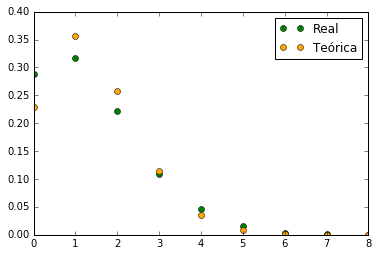

In [12]:
pr2 = []
for y in range(9):
    pr2.append(stats.binom.pmf(y,n,p))

plt.plot(freq_r,'go')
plt.plot(pr2, 'bo', color='orange')
plt.legend(['Real', 'Teórica'])
plt.show()

## E
A vantagem é que com o mesmo modelo é possível realizar uma previsão do que poderia acontecer com um maior número de carros.

## F
Não, pois o mesmo conceito é aplicado seja para carros populares ou não. Ainda, para carros populares a chance de haver carros mais velhos e consequentemente carros com um maior número com itens em não conformidade

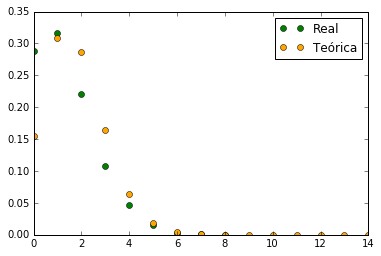

In [17]:
pr3 = []
p = 0.125
for y in range(15):
    pr3.append(stats.binom.pmf(y,n,p))

plt.plot(freq_r,'go')
plt.plot(pr3, 'bo', color='orange')
plt.legend(['Real', 'Teórica'])
plt.show()